# **<font color=blue>Unstructured Data Analytics Assignment 1</font  >**


### *Team: Danqing Wang, Gowtami Khambhampati, Alyssa Bae, Kevin McKinney, Shreya Bakshi, Rick Kim, Rathi Kannan*

We have chosen posts from years 2014 to 2020 for our analysis as they were the latest posts available on the provided forum. 

**Data Processing**

It is important to note that we have excluded the following brands as they were discontinued during the years that the comments were written. Additionally, the comments containing these brands did not contain relevant aspirational mentions to build the analysis. Hence, we have made our judgement to remove data regarding the following brands:

*   *Pontiac*: Defunct in 2010
*   *Mercury*: Defunct in 2011
*   *Suzuki*: Left USA in 2012
*   *Saturn*: Defunct in 2010





# **<font color=blue>Scraper: Fetching 5000 posts from Edmunds.</font>**
Link: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p%7B%7D


In [ ]:
# Install Selenium
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
# Setting web driver
wd = webdriver.Chrome('chromedriver',options=chrome_options)


In [ ]:
import pandas as pd
# Scraper Behavior:

# Since the latest posts are located in the later parts of the pages (p 435 contains most recent comments),
# the scraper pulls data from page 435 and makes its way down the pages. 
# e.g. 435 -> 434 -> 433... etc. until we achieve 5000 comments. 

# Variables 
page_num = 435 # Latest article page
total_comment_count = 5000
count = 0
comments = pd.DataFrame(columns = ['Date','user_id','comments'])

# Iterating through Pages (50 comments per page)
while count < total_comment_count:

  # Fetching routes 
  route = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p{}'.format(page_num) # setting page
  wd.get(route)

  # Getting ids  
  comment_ids = []
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

  # Storing ids
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  # Looping through the page
  for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract user ids from each user on a page
      userid_element = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
      userid = userid_element.text

      #Extract Message for each user on a page
      user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]

      # Removes blockquote from text
      quote = user_message.find_elements_by_tag_name('blockquote')

      if len(quote) > 0:
        quote_text = quote[0].text
        comment = user_message.text
        comment = comment.replace(quote_text,'')
      
      else:
        comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,userid,comment]
      count +=1 

  # Moving onto the next page
  page_num -= 1

# Final output
print(comments)
print(comments.shape[0])
print('Final: ' + str(count))

#count_volvo = 0
#for i in range((comments.shape[0])): 
#  if ('Volvo' in comments.loc[i,'comments']) | ('volvo' in comments.loc[i,'comments']) :
#      count_volvo += 1



                           Date  ...                                           comments
0     February 25, 2020 12:38PM  ...  \nAnd, that's on top of any discount you negot...
1     February 25, 2020 12:41PM  ...  Add $350 to any lease on a Kia if you are not ...
2     February 25, 2020 12:44PM  ...  \n\nDid you hear about the Key FOB scam the de...
3     February 25, 2020 12:47PM  ...  That's a jaw-dropping lease incentive. Amazing...
4     February 25, 2020 12:50PM  ...  \nI'm pretty sure that's the case with any cap...
...                         ...  ...                                                ...
5028      March 27, 2014 2:38PM  ...  \nIn TX I've gone 2 years without a front plat...
5029      March 27, 2014 5:08PM  ...  Got to love AZ, we do not need front plates......
5030      March 27, 2014 5:09PM  ...  \nYes, since you are on the street and the car...
5031      March 27, 2014 6:49PM  ...  I see lots of single plates around here. I'm i...
5032      March 28, 2014 1:47PM 

In [ ]:
# Saving to CSV

comments.to_csv("edmunds_5000_comments.csv", sep="\t")
!ls
from google.colab import files
files.download("edmunds_5000_comments.csv")

 Attributes3.csv	 'edmunds_5000_comments (1).csv'   sample_data
'car models brands.csv'   edmunds_5000_comments.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **<font color=blue>Task A: Test if the data support Zipf’s law</font>**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter, OrderedDict
import nltk
from nltk.corpus import stopwords

In [ ]:
# run this cell to upload files.  
from google.colab import files
uploaded = files.upload()

Saving edmunds_5000_comments (2).csv to edmunds_5000_comments (2).csv


In [ ]:
# get edmunds comment file into a dataframe
edmunds_data = pd.read_csv("edmunds_5000_comments.csv",sep='\t', index_col=0)
df = pd.DataFrame(edmunds_data) 
df

,Date,user_id,comments
0,"February 25, 2020 12:38PM",Michaell,"\nAnd, that's on top of any discount you negot..."
1,"February 25, 2020 12:41PM",andres3,Add $350 to any lease on a Kia if you are not ...
2,"February 25, 2020 12:44PM",andres3,\n\nDid you hear about the Key FOB scam the de...
3,"February 25, 2020 12:47PM",tjc78,That's a jaw-dropping lease incentive. Amazing...
4,"February 25, 2020 12:50PM",Michaell,\nI'm pretty sure that's the case with any cap...
...,...,...,...
5028,"March 27, 2014 2:38PM",ivan_99,\nIn TX I've gone 2 years without a front plat...
5029,"March 27, 2014 5:08PM",flightnurse,"Got to love AZ, we do not need front plates......"
5030,"March 27, 2014 5:09PM",flightnurse,"\nYes, since you are on the street and the car..."
5031,"March 27, 2014 6:49PM",stickguy,I see lots of single plates around here. I'm i...


In [ ]:
# get stopwords from nltk library
nltk.download('stopwords')
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# create a dictionary of words and their frequency.  
word_dictionary = Counter()
all_words = []
word_dict = Counter()
def convert_func(comments):
    for line in comments:
        line = " ".join(str(x) for x in line).replace('(', '').replace(')', '') 
        all_words.extend(re.sub(r'[^a-zA-Z0-9-]', ' ', line).split())
        word_dict.update(Counter(all_words))
    return word_dict
 
 
top_100 = convert_func(df.values).most_common(100)


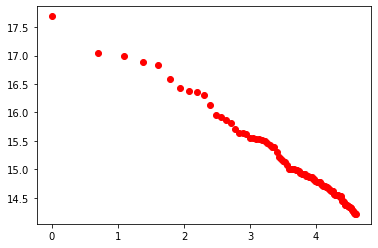

In [ ]:
# Plot the most common 100 words in the data against the theoretical prediction of the law.
import math
import matplotlib

logInds = []
logCounts = []
rank_word_count = []

for (ind, (word, count)) in enumerate(top_100):
    ind = ind+1
    rank_word_count.append((ind,word,count))
    logInds.append(math.log(ind))
    logCounts.append(math.log(count))

plt.plot(logInds,logCounts,'ro')
plt.show()

In [ ]:
 # test if the data support Zipf’s law 
 # Note how when we move by approximately 3x rank, the frequency goes down by about 1/3 thus proving the data supports Zipf's law
print(rank_word_count[10])
print(rank_word_count[30])
print(rank_word_count[90])
 

(11, 'for', 10108579)
(31, 'an', 4057931)
(91, 'by', 1686210)


In [ ]:
# test if the data support Zipf’s law - using linear regression - expected result: b1 is close to -1.0

import sklearn as sklearn
from sklearn import linear_model
 
X = np.c_[logInds]
y = np.c_[logCounts]

model = linear_model.LinearRegression()
model.fit(X,y)
b0, b1 = model.intercept_[0], model.coef_[0][0]
b0,b1
                           

(17.936038914625975, -0.7893801369453494)

# **<font color=blue>Task B: Find the top 10 brands from frequency count</font>**

In [ ]:
# run this cell to upload car models.csv
from google.colab import files
uploaded = files.upload()

Saving car models brands.csv to car models brands (1).csv


In [ ]:
car_data = pd.read_csv("car models brands.csv", header=None, names=['Brand','Model'])

car_data = car_data[car_data["Brand"].str.contains("car|problem|seat|sedan|pontiac|suzuki|saturn|mercury")==False]
print(car_data)
models_list = car_data['Model'].tolist()

     Brand    Model
0    Brand    Model
1    acura  integra
2    acura   legend
3    acura    vigor
4    acura      rlx
..     ...      ...
526  volvo     xc90
527  volvo      s60
528  volvo      s80
529  volvo      v60
530  volvo      c70

[478 rows x 2 columns]


In [ ]:
import nltk 
nltk.download('punkt')

df.dropna(inplace=True)

df['t'] = df['comments'].apply(nltk.tokenize.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def token_cleaner(row):
    clean_tokens = []
    list_row = list(row) #Set --> List
    for word in list_row:
        word = word.lower()
        if word in models_list: #Change any models that appear to their corresponding Brands
            word = car_data['Brand'][car_data['Model']==word].tolist()[0]
            if word not in clean_tokens:
                clean_tokens.append(word.lower())
        else: 
            if word not in clean_tokens: 
                clean_tokens.append(word.lower())
    clean_tokens = [x.lower() for x in clean_tokens]
    return clean_tokens

df['t'] = df['t'].apply(token_cleaner)
# print(comments['Tokens'][0:10])


In [ ]:
cars_dict = dict()

for row in df['t']:
    list_row = list(row) #Set --> List
    for word in row:
        word = word.lower() #Remove any capitalization
        if word in models_list: #Change any models that appear to their corresponding Brands
            word = car_data['Brand'][car_data['Model']==word].tolist()[0]
        if word in cars_dict:
            cars_dict[word] += 1
        else:
            cars_dict[word] = 1

In [ ]:
top_makes = dict()

for i in cars_dict: 
    if i in list(set(car_data['Brand'])):
        top_makes[i] = cars_dict[i]

k = Counter(top_makes) 
high = k.most_common(10) 

top_brands = []
for i in high:
    top_brands.append(i[0])

df_freq = pd.DataFrame(index=top_brands, columns=['Frequency'])

for i in range(0,len(high)):
    df_freq['Frequency'][i] = high[i][1]

print('Brands with Highest Frequency:')
display(df_freq)

Brands with Highest Frequency:


,Frequency
bmw,1036
audi,805
acura,510
honda,423
volkswagen,256
mercedes benz,243
infiniti,232
cadillac,210
hyundai,184
ford,165


#  **<font color=blue>Task C: Calculate lift ratios</font>**  

In [ ]:
import itertools
top_brand_combos = list(itertools.combinations(top_brands,2))
print(top_brand_combos)

[('bmw', 'audi'), ('bmw', 'acura'), ('bmw', 'honda'), ('bmw', 'volkswagen'), ('bmw', 'mercedes benz'), ('bmw', 'infiniti'), ('bmw', 'cadillac'), ('bmw', 'hyundai'), ('bmw', 'ford'), ('audi', 'acura'), ('audi', 'honda'), ('audi', 'volkswagen'), ('audi', 'mercedes benz'), ('audi', 'infiniti'), ('audi', 'cadillac'), ('audi', 'hyundai'), ('audi', 'ford'), ('acura', 'honda'), ('acura', 'volkswagen'), ('acura', 'mercedes benz'), ('acura', 'infiniti'), ('acura', 'cadillac'), ('acura', 'hyundai'), ('acura', 'ford'), ('honda', 'volkswagen'), ('honda', 'mercedes benz'), ('honda', 'infiniti'), ('honda', 'cadillac'), ('honda', 'hyundai'), ('honda', 'ford'), ('volkswagen', 'mercedes benz'), ('volkswagen', 'infiniti'), ('volkswagen', 'cadillac'), ('volkswagen', 'hyundai'), ('volkswagen', 'ford'), ('mercedes benz', 'infiniti'), ('mercedes benz', 'cadillac'), ('mercedes benz', 'hyundai'), ('mercedes benz', 'ford'), ('infiniti', 'cadillac'), ('infiniti', 'hyundai'), ('infiniti', 'ford'), ('cadillac', '

In [ ]:
#Define a function that will calculate Lift
def liftCalc(word1,word2):
    w1freq = sum(df.apply(lambda x: word1 in x['t'], axis=1))
    w2freq = sum(df.apply(lambda x: word2 in x['t'], axis=1))
    bothfreq = sum(df.apply(lambda x: word1 in x['t'] and word2 in x['t'], axis=1))
    return float(bothfreq/len(df))/((float(w1freq)/len(df))*(float(w2freq)/len(df)))

In [ ]:
#Initialize empty dictionary for lift values
brand_lifts = dict()

#iterate over brand combinations, calculate lift, save to dictionary
for i in range(0,len(top_brand_combos)): 
    a,b = top_brand_combos[i]
    brands = (a,b)
    lift = liftCalc(a,b)
    brand_lifts[brands] = lift

In [ ]:
df_lifts = pd.DataFrame(columns=top_brands,index=top_brands)
for brand in top_brands: 
    df_lifts[brand][brand] = '-'
for brands in brand_lifts:
    a,b = brands
    df_lifts[a][b] = '-'
    df_lifts[b][a] = (brand_lifts[brands])

In [ ]:
#Lift values for brands
df_lifts

,bmw,audi,acura,honda,volkswagen,mercedes benz,infiniti,cadillac,hyundai,ford
bmw,-,2.0373,1.4893,1.21232,1.28505,3.62838,2.10613,2.11943,1.44609,1.55397
audi,-,-,2.2829,1.85458,2.57799,4.21899,3.05937,3.23164,1.79338,1.28295
acura,-,-,-,3.62431,1.3436,3.68529,4.40541,2.71425,1.86935,1.19121
honda,-,-,-,-,2.17535,2.02675,2.09395,1.74909,2.31822,1.86707
volkswagen,-,-,-,-,-,2.44727,1.68777,1.39844,2.02165,2.72907
mercedes benz,-,-,-,-,-,-,5.54299,7.22281,3.7633,2.99761
infiniti,-,-,-,-,-,-,-,3.9092,2.70043,2.09488
cadillac,-,-,-,-,-,-,-,-,2.5942,2.31434
hyundai,-,-,-,-,-,-,-,-,-,2.14611
ford,-,-,-,-,-,-,-,-,-,-


In [ ]:
d = Counter(brand_lifts)

print('Brand Combinations With Highest Lift:')
for k, v in d.most_common(10):
    print('%s: %.6f' % (k, v))

Brand Combinations With Highest Lift:
('mercedes benz', 'cadillac'): 7.222807
('mercedes benz', 'infiniti'): 5.542990
('acura', 'infiniti'): 4.405409
('audi', 'mercedes benz'): 4.218993
('infiniti', 'cadillac'): 3.909195
('mercedes benz', 'hyundai'): 3.763301
('acura', 'mercedes benz'): 3.685294
('bmw', 'mercedes benz'): 3.628378
('acura', 'honda'): 3.624308
('audi', 'cadillac'): 3.231636


In [ ]:
print( 'Brand Combinations With Lowest Lift:')
for k, v in d.most_common()[-11:-1]:
    print('%s: %.6f' % (k, v))

Brand Combinations With Lowest Lift:
('honda', 'cadillac'): 1.749094
('volkswagen', 'infiniti'): 1.687769
('bmw', 'ford'): 1.553972
('bmw', 'acura'): 1.489295
('bmw', 'hyundai'): 1.446093
('volkswagen', 'cadillac'): 1.398438
('acura', 'volkswagen'): 1.343597
('bmw', 'volkswagen'): 1.285051
('audi', 'ford'): 1.282951
('bmw', 'honda'): 1.212319


# **<font color=blue>Task D: Show the brands on a multi-dimensional scaling (MDS) map</font>**

In [ ]:
top_brand_lifts = pd.DataFrame(columns=top_brands,index=top_brands)

In [ ]:
for brands in brand_lifts:
    a,b = brands
    top_brand_lifts[a][b] = (1/brand_lifts[brands])
    top_brand_lifts[b][a] = (1/brand_lifts[brands])

In [ ]:
for brand in top_brands: 
    top_brand_lifts[brand][brand] = 0

In [ ]:
top_brand_lifts

,bmw,audi,acura,honda,volkswagen,mercedes benz,infiniti,cadillac,hyundai,ford
bmw,0,0.490846,0.671459,0.824866,0.778179,0.275605,0.474805,0.471824,0.691519,0.643512
audi,0.490846,0,0.43804,0.539206,0.387899,0.237023,0.326865,0.309441,0.557605,0.779453
acura,0.671459,0.43804,0,0.275915,0.744271,0.271349,0.226994,0.368426,0.534945,0.839485
honda,0.824866,0.539206,0.275915,0,0.459697,0.4934,0.477566,0.571725,0.431365,0.535599
volkswagen,0.778179,0.387899,0.744271,0.459697,0,0.408619,0.592498,0.715084,0.494644,0.366425
mercedes benz,0.275605,0.237023,0.271349,0.4934,0.408619,0,0.180408,0.13845,0.265724,0.333599
infiniti,0.474805,0.326865,0.226994,0.477566,0.592498,0.180408,0,0.255807,0.370311,0.477354
cadillac,0.471824,0.309441,0.368426,0.571725,0.715084,0.13845,0.255807,0,0.385475,0.432088
hyundai,0.691519,0.557605,0.534945,0.431365,0.494644,0.265724,0.370311,0.385475,0,0.465959
ford,0.643512,0.779453,0.839485,0.535599,0.366425,0.333599,0.477354,0.432088,0.465959,0


In [ ]:
from sklearn import manifold
from sklearn.manifold import MDS

mds = manifold.MDS(dissimilarity='euclidean')
mds_fit = mds.fit(top_brand_lifts)
coords = mds.fit_transform(top_brand_lifts)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


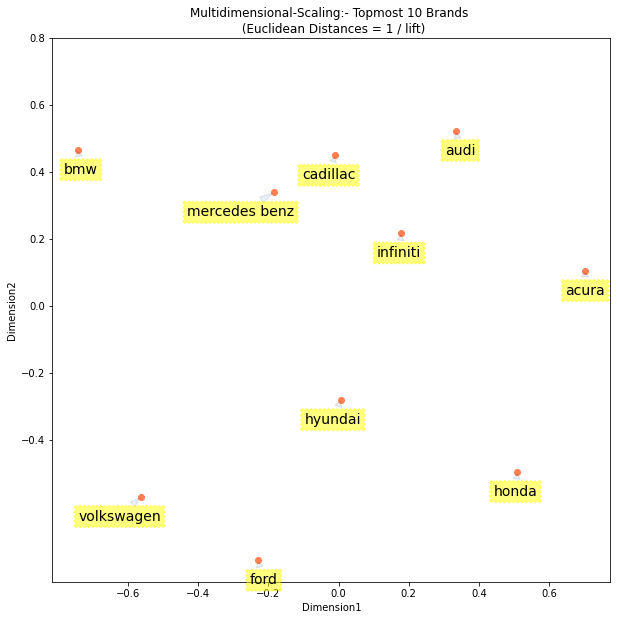

In [ ]:
x,y = coords.T

plt.figure(figsize=(10, 10))
plt.scatter(x,y,c='coral')

for i, txt in enumerate(top_brands):
    plt.annotate(txt, (x[i], y[i]), xycoords='data',
             xytext=(20, -20), textcoords='offset points',
             size=14, ha='right', va="center",
             bbox=dict(boxstyle="Sawtooth",color='yellow' ,alpha=0.5),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
    
plt.xlabel('Dimension1') 
plt.ylabel('Dimension2')   
plt.yticks(np.arange(-0.4, 1, 0.2))
plt.xticks(np.arange(-0.6, 0.7, 0.2))
plt.title('Multidimensional-Scaling:- Topmost 10 Brands \n (Euclidean Distances = 1 / lift)')
plt.show()

#**<font color=blue>Task E: What insights can you offer to your client from your analyses in Tasks C and D</font>**
 

**Cadillac - Independence from other General Motors brands**                    
Assuming the sentiments are positive here, the brands with the highest common lift are 'mercedes benz' and 'cadillac' with the lift value equal to 7.22, 
which turns out to be the highest between any 2 combinations among the top 10 brands. The frequency of occurrence of mercedes benz is 243 and that of cadillac is 210 among the total posts and comments we scraped. 

Owning a Cadillac in America was once synonymous with success and achievement but with an influx of foreign competitors like Mercedes-Benz, Cadillac's share in  the U.S. luxury car market has dropped . Considering the sentiments to be positive it is good sign for Cadillac that it is having high lift with Mercedes-Benz which is seen as a premium luxury brand. Brand identities of luxury automakers have become much more complex over the years.

Digging a bit deeper, looks like for Cadillac the next major step is to create more independence from other General Motors brands in providing a unique driving experience.

**Benz - how should it evolve?**                  
Mercedes-Benz primarily being centered on the safety, luxury, and precision engineering of its cars also needs to reinvent itself to evolve from a company defined  by its gas-guzzling luxury sedans and sports cars to a more fun loving, approachable, and energetic side of Mercedes Benz.

High lift scores of Mercedes-Benz with other brands like acura and infiniti also shows how competitive the entry level luxury car market has become and also that it is tranforming very fast.

**Customer base differentiation and market share**                          
Acura was one of the first Japanese luxury auto in the U.S market, though it is witnessing a rise over the years has struggled to find its identity which is the main reason behind the fact that the brand has been eclipsed by major luxury players.
Acura is owned by Honda and Infiniti is Nissan’s luxury line and the fact that both are Japenese luxury brands explains the high lift between them. They share vehicles in four classes: luxury small car, luxury midsize car, luxury compact SUV, and luxury midsize SUV. Researching a bit more we got that Infinity has a name in luxury sports car segment, whereas Acuras aren’t fast enough to be classified in this segment. So, there is a customer base differentiation here which prevents eating each other's market share and the brands could carve out niche market for each other. Acura can  build on top of existing features making their cars more attractive and giving more attention to finer details like high end luxury brands- Mercedez-Benz or BMW. Similarly Infiniti could work on building up it's reputation as a luxury sports car brand.

#**<font color=blue>Task F: 5 most frequently mentioned attributes of cars</font>**

In [ ]:
#Initialize empty dictionary 
all_words_dict = dict()

#Iterate over each row of tokens and track frequency in the 'words_dict' dictionary
for row in df['t']:
    list_row = list(row) #Set --> List
    for word in row:
        word = word.lower() #Remove any capitalization
        if word in all_words_dict:
            all_words_dict[word] += 1
        else:
            all_words_dict[word] = 1

In [ ]:
k = Counter(all_words_dict) 
#k.most_common(500) 

In [ ]:
# run this cell to upload attributes3.csv
from google.colab import files
uploaded = files.upload()

Saving Attributes3.csv to Attributes3 (1).csv


In [ ]:
#Read in CSV of attributes to map
attribute_map = pd.read_csv("Attributes3.csv")
attribute_map.columns =['key','attribute']
attributes = set(attribute_map['attribute'].to_list())
keys = set(attribute_map['key'].to_list())

In [ ]:
def attribute_cleaner(row):
    clean_tokens = []
    for word in row:
        if word in keys: 
            word = attribute_map['attribute'][attribute_map['key']==word].tolist()[0]
            clean_tokens.append(word)
        else: 
            clean_tokens.append(word)
    return clean_tokens

df['t'] = df['t'].apply(attribute_cleaner)

In [ ]:
att_lift = pd.DataFrame(columns=top_brands, index=attributes)

for brand in top_brands:
    for attrib in attributes:
        try:
            att_lift[brand][attrib] = liftCalc(brand,attrib)
        except: 
            att_lift[brand][attrib] = 'N/A'


In [ ]:
#Top 5 Attributes were Chosen by Frequency
top5attributes = ['performance','comfort','efficiency','safety','styling']
att_lift2 = att_lift.loc[top5attributes][top_brands[0:5]]
att_lift2.style.apply(lambda x: ["background: yellow" if v > 1.8 else "" for v in x], axis = 1)

,bmw,audi,acura,honda,volkswagen
performance,1.460167,1.620343,1.522248,1.531694,1.404809
comfort,1.751519,2.053017,2.169182,1.897706,1.765457
efficiency,1.180663,1.723292,1.667157,2.539007,2.505534
safety,1.423707,1.832248,1.740863,1.929645,1.622188
styling,1.785779,2.242506,2.286476,2.120573,1.576762


# **<font color=blue>Task G: What advice will you give to your client from Task F</font>**

**Audi - Comfort versus Fuel economy**                                         
Audi has a high lift for “comfort” and “styling” compared to BMW and other brands(except Acura). Though Audi has gone to great lengths to reduce energy consumption on all levels, given the popular perception in
terms of "efficiency" it has to take more action oriented steps that results in better fuel economy. Audi pulls ahead when it comes to "performance" as well and for a premium brand like Audi any new changes and improvisations is regarded as "the Performance of the Performance".

**Acura - giving stiff competition to BMW and Audi**                           
Acura is owned by Honda and it is known for luxury small cars and luxury midsize cars and it has good lift scores when it comes to "safety" , "comfort" and "styling" and this should be a good news for the brand . 
With a starting price right around $25K-$30K and the low maintenance costs associated with Japanese brand, Acura is witnessing a rise and will give a stiff competition to European brands like the pricier BMW and Audi.
Based on the public perception it should capitalize on not only reliability and affordability but also on high performance with luxury driving experience.

**Honda - heading in the right direction**                                       
Honda continues to operate as a well-established, trusted brand and with its determined focus on reducing fossil fuel consumption, it has a high efficiency lift.
Honda has decided to strive for the "realization of carbon neutrality by 2050" and together with more emphasis being given on the performance aspect, should be a step in the right direction 

**BMW - improve efficiency**                                                     
Though BMW scored low on comfort, styling and performance, there is no doubt that it is still one of the leading luxury car manufacturers. However; as a wave of change is sweeping across the automobile industry the need for rapid innovation at BMW has become more urgent than ever before. It's low score on efficiency also reflects on the fact that now it has to come up with environmentally friendly technologies but still have a personalized and luxurious experience.


#**<font color=blue>Task H: Most Aspirational Brands with the lift values</font>**

In [ ]:
aspiration_comments = pd.read_csv("edmunds_5000_comments.csv",sep='\t', index_col=0)
aspiration_comments.dropna(inplace=True)
aspiration_comments['Tokens2'] = aspiration_comments['comments'].apply(nltk.tokenize.word_tokenize)
#aspiration_comments.tail()

In [ ]:
def lower_func(row):
    list_row = list(row)
    token=[]
    for word in list_row:
        word=word.lower()
        if word in models_list: #Change any models that appear to their corresponding Brands
            word = car_data['Brand'][car_data['Model']==word].tolist()[0]
            if word not in token:
                token.append(word) 
        else: 
                token.append(word) 
    return token

aspiration_comments['Tokens2'] = aspiration_comments['Tokens2'].apply(lower_func)

#print(aspiration_comments)

In [ ]:
def attach_together(token_list):
    r=''
    for each in token_list:
        r=r+'' + each + ' '
    return r

aspiration_comments['Attached_Tokens'] = aspiration_comments['Tokens2'].apply(attach_together)
#print(aspiration_comments)

In [ ]:
#aspirations =["perfect","winner", "favor", "promise",  "heart", "dream", "loving", "desire","desirable", "top","anticipate", "ultimate", "excellent", "excellence", "fantastic", "aspire", "amazing", "luxury", "luxurious"]
aspirations=["perfect","luxury","luxurious", "dream", "loving", "desire","desirable", "top","best", "ultimate", "excellent", "excellence", "fantastic", "aspire", "amazing", "enjoy", "impressive", "special"]
unique_brands=list(set(car_data.Brand.values))
#print(unique_brands)

In [ ]:
#Define a function that will calculate Lift based on new tokens
def liftCalc_aspiration(word_1,word_2):
  
    w1freq = sum(aspiration_comments.apply(lambda x: word_1 in x.Attached_Tokens_Tokenized, axis=1))
    w2freq = sum(aspiration_comments.apply(lambda x: word_2 in x.Attached_Tokens_Tokenized, axis=1))
    bothfreq = sum(aspiration_comments.apply(lambda x: word_1 in x.Attached_Tokens_Tokenized and word_2 in x.Attached_Tokens_Tokenized, axis=1))
    try:
        return float(bothfreq/len(aspiration_comments))/((float(w1freq)/len(aspiration_comments))*(float(w2freq)/len(aspiration_comments)))
    except:
        return 0

In [ ]:
def find_aspirations(each_at):
  

    for each_aspiration in aspirations:
        if each_aspiration in each_at:
            for brand in unique_brands:
                if brand in each_at:
                    each_at=each_at.replace(each_aspiration,'aspirations_find_out')          
                    #print(brand,each_aspiration) 
    return each_at

aspiration_comments.Attached_Tokens=aspiration_comments.Attached_Tokens.apply(find_aspirations)
aspiration_comments['Attached_Tokens_Tokenized']=aspiration_comments.Attached_Tokens.apply(nltk.tokenize.word_tokenize)
#print(aspiration_comments)
#print(each_at)

In [ ]:
import operator
d = {} 
for brand in unique_brands:
    lift=liftCalc_aspiration(brand,'aspirations_find_out')
    if lift>0:
        d[brand]=lift
        #print(d)
sorted_d= sorted(d.items(), key=operator.itemgetter(1),reverse=True)

df_aspiration = pd.DataFrame(sorted_d,columns=['Brand','Lift'])

print('\n Brands and Lift Values:')
display(df_aspiration[0:10])


 Brands and Lift Values:


,Brand,Lift
0,toyota,3.285303
1,lincoln,3.070689
2,mercedes,3.035877
3,hyundai,2.978039
4,chrysler,2.944258
5,chevrolet,2.885611
6,infiniti,2.834272
7,cadillac,2.818076
8,buick,2.803512
9,mazda,2.739796


# **<font color=blue>Analysis of Aspirational Brands </font>**

# **<font color=blue>Top rated vehicles on JD Power  </font>**


![](https://drive.google.com/uc?export=view&id=1RrgwVk8UwpgM1xFQ3PyLjJ-XNcDaXsUn)


JD Power show's that Nissan, Murano and Kia are the top rated consumer vehicles. Our team's findings based on analytics on aspirational brands can help JD Power refine their recommendations. One could tell at first glance that when consumers are discussing entry-level luxury cars, BMW has the most frequency.

- Brands with Highest Frequency:
   - bmw 	             1036
   - audi 	              805
   - acura 	            510
   - honda 	            423
   - volkswagen 	        256
   - mercedes benz 	    243
   - infiniti 	          232
   - cadillac 	          210
   - hyundai 	          184
   - ford 	              165

Also, there is definite correlation between lift associations from our dataset and JD Power listings online.

Brand Combinations With Highest Lift:
* mercedes benz, cadillac:            7.222807
* mercedes benz, infiniti:            5.542990
* acura, infiniti:                    4.405409
* audi, mercedes benz:                4.218993
* infiniti, cadillac :                3.909195
* mercedes benz, hyundai:             3.763301
* acura, mercedes benz :              3.685294
* bmw, mercedes benz  :               3.628378
* acura, honda:                       3.624308
* audi, cadillac:                     3.231636



# **<font color=blue>What customers are actually buying? </font>**

However; a deep dive into our data and consumer's aspirations show that consumers are going for the following brands. 

* Our Analytics Team's Top 5 Aspirational Brands:
  * Toyota 3.13
  * Chevrolet 2.91
  * Mercedes 2.88
  * Lincoln 2.83
  * Chrysler 2.82

* Top car recommendations on JD Power:

![](https://drive.google.com/uc?export=view&id=1_CkpxkybMPU17V-HC5XMJy8Kx4g8g6_D)

**<font color=blue><u>Our team can help incorporate analytics featuring consumer's aspirations and project the right car brands so people spending time evaluating cars on JD Power understand that REAL INSIGHTS on JD Power are coming from REAL ASPIRATIONS.</u></font>**

#### **<font color=blue>So why is our recommendation different? </font>**

Our recommendations filter consumer's comments based on their aspirations. This goes into the heart and soul of what consumer's feel before buying a car. Understanding aspirations is "Knowing the customer", and "Knowing the customer" is giving them delight. Our analytics is also supported by the following deep dive to answer questions on why consumers end up buying brands different from what they discuss or research more about.

**Price Factor**

It’s worth to notice that Toyota is on the top place of aspirational brands followed by Chevrolet. Toyota has a lift value of 3.13 and Chevrolet has a lift value of 2.91 in association with aspirational customer sentiment.Hyundai, Toyota and Chevrolet’s appearance so high on the list was surprising, but may confirm the popular belief that American car buyers are not very brand conscious. On the other hand, we conclude that a majority of the customers are inclined to pick a car that gives them more bang for their buck. 

Toyota's luxury brand Lexus (Lexus IS ,ES or RX) is always on top 10 in any entry level luxury cars rankings. Lexus IS starts at 39,050 USD. Compare this to Mercedes Benz/Audi/BMW -  C-Class starts at 42,650 USD, Audi A4 starts at 40,145 USD and BMW 3 Series starts at 42,245 USD. For obvious reasons entry level Lexus and Infiniti have great price advantage.

**Maintenance costs**

It was surprising to see that BMW did not find it's spot in the Top 5 aspirational brands. The data supports the fact that affordable maintenance and repairs price is very import for entry level luxury car buyers. PepcriPal ranked Lexus in 6th place overall for its low ownership costs. It’s reported at about 551 USD per year. However, on average, BMW owners can expect to pay between 150 USD to 400 USD per service every 10,000 miles. A major service can cost upwards of 1,000 USD to 3,000 USD or even more. At the end of the day, owners pay about $1,000 to 1,700 per year for maintenance and repairs for a BMW – higher than most brands.  

**Features and comfort**

Lincoln and Chrysler are touching consumer sentiment by providing features that customers aspire for. Lincoln seems to be benefitting from sanctuary-inspired designs. Designers gave Lincoln vehicles 30-way power seats for precise cushion firmness and support as well as a massage feature. Selecting the “calm” mode on the dashboard “decluttered” it of nonessential data, like climate controls. Chrysler is putting kids at the head of their marketing efforts, with all-new commercials featuring them as showroom reps pitching parents and their children on the Chrysler Pacifica. You’ll see the kids demonstrating certain features, like the built-in vacuum cleaner, as tactics for selling parents on the Chrysler Pacifica. These superior features seem to have clearly been favored by potential car buyers.

**Other Brands**

The low co-occurrence of other brands and aspirational phrases reflects their market positions as reliable economy cars, not luxury mid-sized sedans which people "aspire to own". Even if they offer higher-end product features, the brand image for Toyota and Chevrolet are superior from customers' perspectives. Honda, Mazda, Volkswagen appear further down in the list. These brands are considered family-oriented cars with a strong focus on safety and comfort, while being affordable.

**Summary - Showcase consumers aspirations**

We have included phrases such as ‘dream’, ‘desire, ‘ultimate, ’looking to buy’, ‘aspire’, ‘best’, etc. as aspirational words. These words were picked after ensuring that a sample of comments retrieved for a given phrase displayed strong aspiration or wistful intent to buy a car of a certain make or model.

In conclusion, customers usually have only 2 to 3 brands in their aspiration list for car purchases, and predominantly their final purchases come from this selection. As a car company, it is very important to break into customers’ initial list. While car companies should focus on self-positioning their brand by investing in R&D, production, marketing, and service to establish a distinctive brand image by building on consumers aspirations, JD power's REAL INSIGHTS FROM REAL OWNERS can be enhanced by presenting customer's real aspirations towards brands and our analytics team has the best tools to present this information!
